In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
from pyhdf import SD, SDC
import os



ModuleNotFoundError: No module named 'cartyoy'

In [3]:
#all_files = os.listdir("/scratch/fslippe/modis/MOD02/cao_test_data/")
#hdf = SD("/scratch/fslippe/modis/MOD02/cao_test_data/%s" %(all_files[2]) , SDC.READ)
import importlib
import extract_training_data
importlib.reload(extract_training_data)
from extract_training_data import *
start = "20210321"
end = "20210321"
#start = "20210701"
#end = "20210702"
start_converted = convert_to_day_of_year(start)
end_converted = convert_to_day_of_year(end)
folder = "/scratch/fslippe/modis/MOD02/daytime_1km/"

#x_cao, dates_cao, masks_cao = extract_1km_data("/scratch/fslippe/modis/MOD02/july_2021/", bands=bands, start_date=start_converted, end_date=end_converted)

# x_cao, dates_cao, masks_cao, lon_lats = extract_1km_data("/scratch/fslippe/modis/MOD02/cao_test_data/",
#                                                          bands=bands,
#                                                          start_date=start_converted,
#                                                          end_date=end_converted,
#                                                          return_lon_lat=True)

x_cao, dates_cao, masks_cao, lon_lats = extract_1km_data(folder,
                                                         bands=[29],
                                                         start_date=start_converted,
                                                         end_date=end_converted,
                                                         return_lon_lat=True,
                                                         max_zenith=45,
                                                         workers=1)
x_cao, dates_cao, masks_cao, lon_lats = zip(*[(xi, date, mask, lon_lat) for xi, date, mask, lon_lat in zip(x_cao, dates_cao, masks_cao, lon_lats) if (xi.shape[0] > 64) and (xi.shape[1] > 64)])

x_cao = list(x_cao)
dates_cao = list(dates_cao)

total cores: 256
['/scratch/fslippe/modis/MOD02/daytime_1km/']


  0%|          | 0/1 [00:00<?, ?it/s]

49.950474
46.316917
58.510036
42.61129
55.163307
38.930687


100%|██████████| 1/1 [00:12<00:00, 12.66s/it]


In [66]:
import cartopy.geodesic as cgeo

all_files = os.listdir("/scratch/fslippe/modis/MOD02/cao_test_data/")
hdf = SD("/scratch/fslippe/modis/MOD02/cao_test_data/%s" %(all_files[2]) , SDC.READ)

lon = hdf.select("Longitude")[:]
lat = hdf.select("Latitude")[:]
data = hdf.select("EV_1KM_Emissive")[:][0]
print(data.shape)
zoom_factor_y = data.shape[0] / lat.shape[0]
zoom_factor_x = data.shape[1] / lat.shape[1]

zoom_factors = (zoom_factor_y, zoom_factor_x)  # Now considering only 2 dimensions

lon = zoom(lon, zoom_factors, order=1)  # order=0 for nearest neighbor interpolation
lat = zoom(lat, zoom_factors, order=1)  # order=0 for nearest neighbor interpolation
zenith_row = np.load("/uio/hume/student-u37/fslippe/master_project/code/data/sensor_zenith_bilinear_1km.npy")

import cartopy.geodesic as cgeo
# Sample data
pic = 3
lat_row = lat[0, :]  # Taking the first row of latitudes
lon_row = lon[0, :]  # Taking the first row of longitudes
zenith_angle_deg = 45  # example value

# Geodesic computation
geod = cgeo.Geodesic()

# Pre-allocate an array for distances (size will be one less than the number of points)
distances = np.zeros(len(lon_row) - 1)

for i in range(len(lon_row) - 1):
    # Using zenith angle for correction. I2f zenith is an array, use zenith_row[i]
    distance, _, _ = geod.inverse([lon_row[i], lat_row[i]], [lon_row[i + 1], lat_row[i + 1]])[0]
    distances[i] = distance / np.cos(np.deg2rad(zenith_angle_deg))  # Correcting for zenith angle



(2040, 1354)


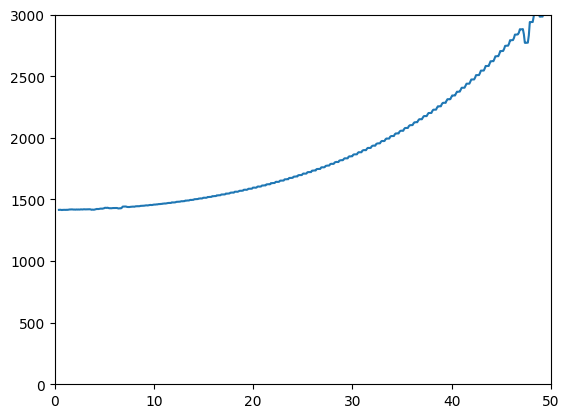

In [68]:
plt.plot(zenith_row[1:][int(1354/2):], distances[:][int(1354/2):])
plt.gca().set_xlim(0,50)
plt.gca().set_ylim(0,3e3)

plt.show()

In [47]:
(zenith_row < 50)

array([False, False, False, ..., False, False, False])